<a href="https://colab.research.google.com/github/bhavyagautam/Spotify-Data-Analysis/blob/main/SpotifyDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing required python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loading data from the csv file



In [2]:
df_tracks= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify-Datasets/tracks.csv')
df_tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


#Cleaning up the data


Checking for null values in the provided dataset

In [3]:
pd.isnull(df_tracks).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [4]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

Removing unnecesary columns from the dataset

In [5]:
df_tracks.drop(columns=["id","explicit","mode"],inplace=True)
df_tracks.head()

,name,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,Carve,6,126903,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,Lady of the Evening,0,163080,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Setting the name as the index for the dataframe

In [6]:
df_tracks.set_index('name',inplace=True)
df_tracks.head()

,popularity,duration_ms,artists,id_artists,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
name,,,,,,,,,,,,,,,,
Carve,6,126903,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851,3
Capítulo 2.16 - Banquero Anarquista,0,98200,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009,1
Vivo para Quererte - Remasterizado,0,181640,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418,5
El Prisionero - Remasterizado,0,176907,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980,3
Lady of the Evening,0,163080,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220,4


Converting duration of the song from miliseconds to seconds

In [7]:
df_tracks["duration"]=df_tracks["duration_ms"].apply(lambda x:round(x/1000))
df_tracks.drop(columns="duration_ms",inplace=True)

In [8]:
df_tracks.head(10)

,popularity,artists,id_artists,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
name,,,,,,,,,,,,,,,,
Carve,6,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,127
Capítulo 2.16 - Banquero Anarquista,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,98
Vivo para Quererte - Remasterizado,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,182
El Prisionero - Remasterizado,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,177
Lady of the Evening,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,163
Ave Maria,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,179
La Butte Rouge,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5,134
La Java,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,161
Old Fashioned Girl,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4,310


Setting time as datetime

In [9]:
df_tracks['release_date']=pd.to_datetime(df_tracks.release_date)

#Analysing Songs

##Descriptive statistics of the data

In [10]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996
instrumentalness,586672.0,0.113451,0.266868,0.0,0.0000,0.000024,0.00955,1.000
liveness,586672.0,0.213935,0.184326,0.0,0.0983,0.139000,0.27800,1.000
valence,586672.0,0.552292,0.257671,0.0,0.3460,0.564000,0.76900,1.000


##Finding the 10 most popular songs on spotify


In [11]:
df_tracks.sort_values('popularity',ascending=False).head(10)

,popularity,artists,id_artists,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
name,,,,,,,,,,,,,,,,
Peaches (feat. Daniel Caesar & Giveon),100,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4,198
drivers license,99,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4,242
Astronaut In The Ocean,98,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4,133
Save Your Tears,97,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,216
telepatía,97,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4,160
Leave The Door Open,96,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4,242
Blinding Lights,96,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,200
The Business,95,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4,164
Heartbreak Anniversary,94,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3,198


##Correlation Heatmap

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'key'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'time_signature'),
 Text(12.5, 0, 'duration')]

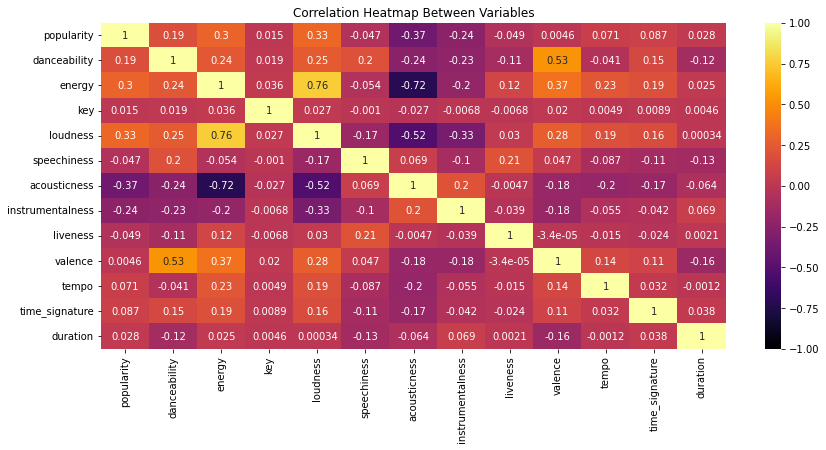

In [12]:
corr_df=df_tracks.corr(method="pearson")
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(corr_df,annot=True,vmin=-1, vmax=1, center=0,  cmap="inferno")
heatmap.set_title('Correlation Heatmap Between Variables')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)

##Taking a 0.5% sample of the dataframe and finding correlations

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

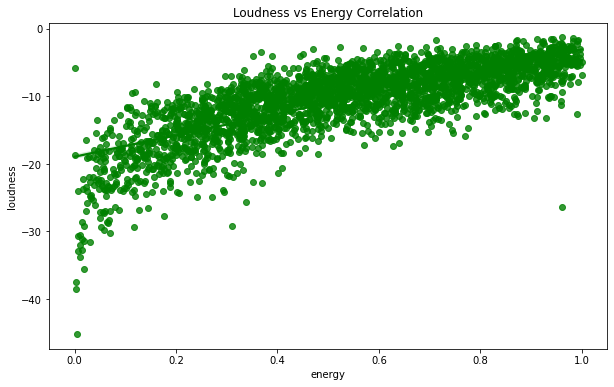

In [13]:
sample_df=df_tracks.sample(int(0.005*len(df_tracks)))
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="loudness",x="energy", color="g").set(title="Loudness vs Energy Correlation")

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

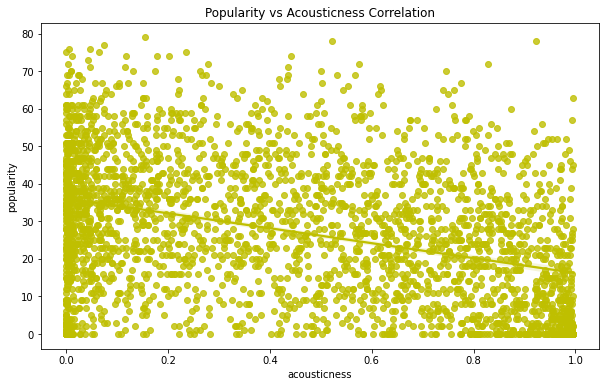

In [14]:
sample_df=df_tracks.sample(int(0.005*len(df_tracks)))
plt.figure(figsize=(10,6))
sns.regplot(data=sample_df,y="popularity",x="acousticness", color="y").set(title="Popularity vs Acousticness Correlation")

##Correlation between year and number of songs released

In [15]:
years=df_tracks.release_date.dt.year


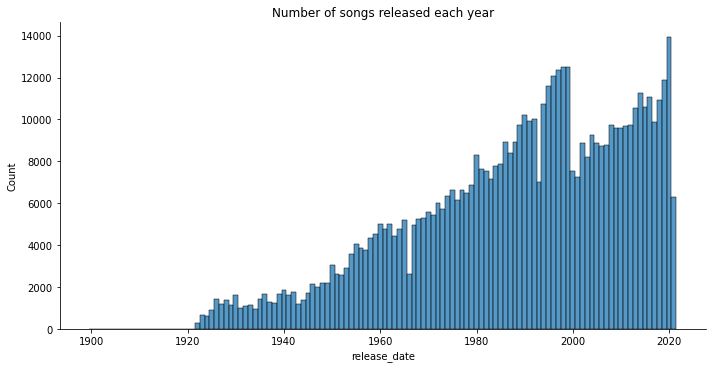

In [16]:
sns.displot(years,discrete=True,aspect=2,height=5,kind="hist").set(title="Number of songs released each year")

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 <a list of 101 Text major ticklabel objects>)

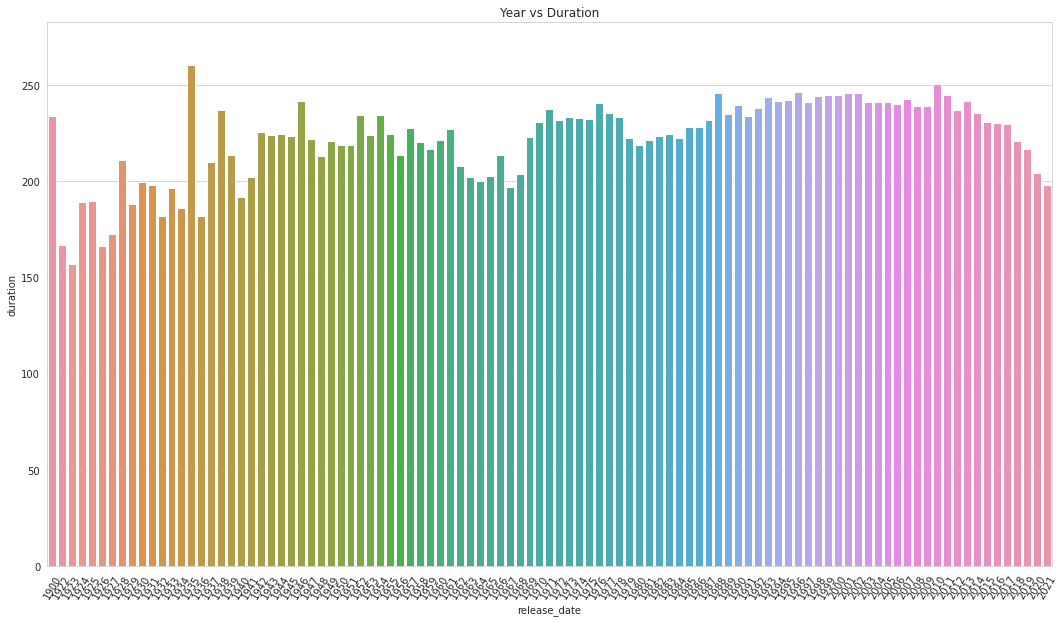

In [17]:
total_dr=df_tracks.duration
sns.set_style(style="whitegrid")
fig_dims= (18,10)
fig, ax=plt.subplots(figsize=fig_dims)
fig=sns.barplot(x=years,y=total_dr,ax=ax,errwidth=False).set(title="Year vs Duration")
plt.xticks(rotation=60)


##Importing data for genre analysis

In [18]:
df_genre=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify-Datasets/SpotifyFeatures.csv')
df_genre.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


##Duration of the songs

In [19]:
df_genre["duration"]=df_genre["duration_ms"].apply(lambda x:round(x/1000))
df_genre.drop(columns='duration_ms')

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,99
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,137
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,170
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,152
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962,326
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,282
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813,167
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489,222


Text(0, 0.5, 'Genres')

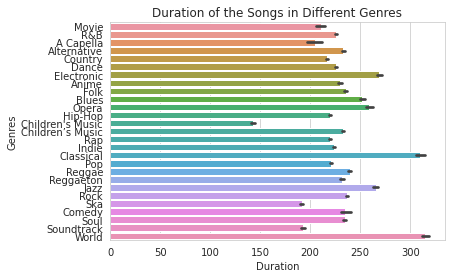

In [20]:
plt.title("Duration of the Songs in Different Genres")
sns.color_palette("rocket",as_cmap=True)
sns.barplot(y='genre',x='duration',data=df_genre)
plt.xlabel("Duration")
plt.ylabel("Genres")

##Popularity of Genres

[Text(0.5, 1.0, 'Popularity of different genres')]

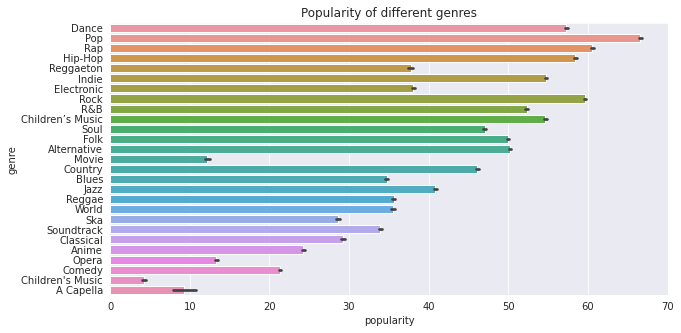

In [21]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10,5))
famous=df_genre.sort_values("popularity", ascending= False)
sns.barplot(y='genre',x='popularity',data=famous).set(title="Popularity of different genres")
